In [21]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans, SpectralClustering

In [22]:
data = pd.read_csv('evaluation_results/tfidf_params_final.csv')
print('number of items = ', len(data))
print('keys = ', data.keys())
print('-------vectorizers--------')
print(data['vectorizer'].unique())
print('-------similarity metrics--------')
print(data['similarity_metric'].unique())
print('-------languages-----------')
print(data['language'].unique())

number of items =  582
keys =  Index(['vectorizer', 'similarity_metric', 'min_df_param', 'max_df_param',
       'language', 'langfilter', 'accuracy (%)',
       'accuracy (average relevancy > 0) (%)', 'ndcg', 'ndcg (full rank)'],
      dtype='object')
-------vectorizers--------
['tfidf']
-------similarity metrics--------
['cosine' 'linear' 'rbf']
-------languages-----------
['javascript' 'java' 'python' 'go']


In [23]:
data.head(10)

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
0,tfidf,cosine,0.30,0.9,javascript,False,0.000000,0.000000,0.000000,0.000000
1,tfidf,cosine,50.00,1.0,java,True,24.477245,23.112128,0.202992,0.101007
2,tfidf,cosine,0.00,0.8,python,False,22.143579,23.208191,0.270402,0.146241
3,tfidf,cosine,0.60,0.8,java,True,0.000000,0.000000,0.000000,0.000000
4,tfidf,cosine,0.60,1.0,python,True,0.000000,0.000000,0.000000,0.000000
5,tfidf,cosine,700.00,0.9,java,True,19.557196,19.450801,0.177812,0.084971
6,tfidf,cosine,0.05,0.7,go,True,0.000000,0.000000,0.000000,0.000000
7,tfidf,cosine,900.00,1.0,go,True,13.855422,13.461538,0.103880,0.028020
8,tfidf,cosine,0.50,0.9,javascript,False,0.000000,0.000000,0.000000,0.000000
9,tfidf,cosine,0.01,0.4,go,False,2.409639,1.923077,0.013067,0.002438


In [24]:
py_yes_cosine = {'language': 'python', 'langfilter': True, 'similarity_metric':'cosine'}
py_yes_rbf = {'language': 'python', 'langfilter': True, 'similarity_metric':'rb'}
py_yes_linear = {'language': 'python', 'langfilter': True, 'similarity_metric':'linear'}
py_no_cosine = {'language': 'python', 'langfilter': False, 'similarity_metric':'cosine'}
py_no_rbf = {'language': 'python', 'langfilter': False, 'similarity_metric':'rb'}
py_no_linear = {'language': 'python', 'langfilter': False, 'similarity_metric':'linear'}

def build_filter(data, kf: dict):
    if (len(kf.keys()) < 1):
        raise ValueError()
        
    tempk, tempv = list(kf.keys())[0], list(kf.values())[0]
    base = (data[tempk] == tempv)
    for k,v in kf.items():
        base = base & (data[k] == v)
    return base

In [25]:
accuracy_filter = (data['accuracy (%)'] > 0.000) & \
                (data['accuracy (average relevancy > 0) (%)'] > 0.000) & \
                (data['ndcg'] > 0.000) & \
                (data['ndcg (full rank)'])

# Understanding Data

In [27]:
benchmark = pd.read_csv('evaluation_results/reference_benchmarks.csv')
benchmark.sort_values(by=['language'])

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
1,selfatt,None,None,None,go,False,6.63,8.65,0.101,0.058
5,nbow,None,None,None,go,False,15.06,21.15,0.221,0.146
2,selfatt,None,None,None,java,False,11.19,14.42,0.173,0.115
6,nbow,None,None,None,java,False,21.65,26.54,0.257,0.201
3,selfatt,None,None,None,javascript,False,9.40,13.25,0.153,0.060
7,nbow,None,None,None,javascript,False,21.32,25.30,0.232,0.152
0,selfatt,None,None,None,python,False,17.09,18.32,0.239,0.167
4,nbow,None,None,None,python,False,24.77,26.28,0.306,0.233


In [28]:
full_res = data[build_filter(data, {'language': 'python'}) & accuracy_filter]
full_res.sort_values(by=['accuracy (%)', 'ndcg', 'ndcg (full rank)'], ascending=False).head(10)

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
239,tfidf,cosine,50.0,1.0,python,True,24.469161,25.597270,0.290676,0.146960
231,tfidf,cosine,50.0,0.9,python,True,24.469161,25.597270,0.290676,0.146694
515,tfidf,cosine,50.0,0.8,python,True,24.469161,25.597270,0.290676,0.146694
37,tfidf,linear,100.0,1.0,python,False,24.469161,25.483504,0.284858,0.146937
65,tfidf,cosine,100.0,None,python,False,24.469161,25.483504,0.284858,0.146937
108,tfidf,rbf,100.0,1.0,python,False,24.469161,25.483504,0.284858,0.146937
232,tfidf,cosine,100.0,1.0,python,True,24.469161,25.483504,0.284858,0.146937
240,tfidf,cosine,100.0,0.8,python,True,24.368049,25.369738,0.282860,0.146287
511,tfidf,cosine,100.0,0.9,python,True,24.368049,25.369738,0.282860,0.146287
351,tfidf,cosine,100.0,None,python,True,24.266936,25.369738,0.283487,0.146810


In [29]:
full_res = data[build_filter(data, {'language': 'go'})]
full_res.sort_values(by=['accuracy (%)', 'ndcg', 'ndcg (full rank)'], ascending=False).head(10)

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
51,tfidf,cosine,0.0,1.0,go,False,24.096386,25.961538,0.259306,0.071824
265,tfidf,cosine,0.0,0.4,go,True,24.096386,25.961538,0.259306,0.071453
121,tfidf,cosine,0.0,0.4,go,False,24.096386,25.961538,0.259306,0.071440
327,tfidf,cosine,0.0,0.8,go,True,24.096386,25.961538,0.259306,0.071378
536,tfidf,cosine,0.0,0.6,go,True,24.096386,25.961538,0.259306,0.071378
120,tfidf,cosine,0.0,0.5,go,False,24.096386,25.961538,0.259306,0.071377
543,tfidf,cosine,0.0,0.5,go,True,24.096386,25.961538,0.259306,0.071377
85,tfidf,cosine,0.0,1.0,go,True,24.096386,25.961538,0.259306,0.071370
96,tfidf,cosine,0.0,0.9,go,False,24.096386,25.961538,0.259306,0.071360
434,tfidf,cosine,0.0,0.9,go,True,24.096386,25.961538,0.259306,0.071360


In [30]:
full_res = data[build_filter(data, {'language': 'java'})]
full_res.sort_values(by=['accuracy (%)', 'ndcg', 'ndcg (full rank)'], ascending=False).head(10)

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
53,tfidf,cosine,100.0,None,java,False,24.723247,23.569794,0.224640,0.098874
69,tfidf,cosine,100.0,0.8,java,True,24.723247,23.569794,0.224640,0.098874
336,tfidf,cosine,100.0,0.9,java,True,24.723247,23.569794,0.224640,0.098874
509,tfidf,cosine,100.0,1.0,java,True,24.723247,23.569794,0.224640,0.098874
1,tfidf,cosine,50.0,1.0,java,True,24.477245,23.112128,0.202992,0.101007
12,tfidf,cosine,50.0,0.9,java,True,24.477245,23.112128,0.202992,0.101007
247,tfidf,cosine,50.0,0.8,java,True,24.477245,23.112128,0.202992,0.101007
18,tfidf,cosine,100.0,None,java,True,24.354244,23.112128,0.219021,0.097968
45,tfidf,cosine,0.0,0.9,java,True,22.878229,23.798627,0.220600,0.102095
97,tfidf,cosine,0.0,0.8,java,False,22.878229,23.798627,0.220600,0.102095


In [31]:
full_res = data[build_filter(data, {'language': 'javascript'})]
full_res.sort_values(by=['accuracy (%)', 'ndcg', 'ndcg (full rank)'], ascending=False).head(10)

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
326,tfidf,cosine,50.0,1.0,javascript,True,22.884013,25.903614,0.219616,0.096494
164,tfidf,cosine,50.0,0.8,javascript,True,22.884013,25.903614,0.219616,0.096331
386,tfidf,cosine,50.0,0.9,javascript,True,22.884013,25.903614,0.219616,0.096331
294,tfidf,cosine,100.0,None,javascript,False,22.884013,25.903614,0.210216,0.095089
534,tfidf,cosine,100.0,1.0,javascript,True,22.884013,25.903614,0.210216,0.095089
341,tfidf,cosine,100.0,0.9,javascript,True,22.570533,25.903614,0.210216,0.095020
417,tfidf,cosine,100.0,0.8,javascript,True,22.570533,25.903614,0.210216,0.095020
54,tfidf,cosine,100.0,None,javascript,True,22.570533,25.903614,0.210216,0.093593
204,tfidf,cosine,200.0,1.0,javascript,True,22.570533,24.698795,0.189697,0.081804
145,tfidf,cosine,200.0,0.8,javascript,True,22.257053,24.698795,0.189697,0.081783


In [ ]:
print('{},{},{},{},{}'.format('language','filter','similarity', 'nonzero', 'totaltrials'))
for l in ['python', 'go', 'javascript', 'java']:
    for f in [True, False]:
        for sm in ['cosine', 'rb', 'linear']:
            temp = {'language': l, 'langfilter': f, 'similarity_metric': sm }
            temp_filter = build_filter(data, temp)
            total_count = len(data[temp_filter])
            if total_count < 2:
                continue
            non0tfidf = len(data[temp_filter & accuracy_filter])
            print('{},{},{},{},{}'.format(l, f, sm, non0tfidf, total_count))

# Benchmarks By Similarity

In [32]:
data[data['similarity_metric'] == 'linear']

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
37,tfidf,linear,100.0,1.0,python,False,24.469161,25.483504,0.284858,0.146937
406,tfidf,linear,100.0,1.0,python,True,24.266936,25.369738,0.283487,0.146810


In [33]:
data[data['similarity_metric'] == 'rbf']

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
108,tfidf,rbf,100.0,1.0,python,False,24.469161,25.483504,0.284858,0.146937
559,tfidf,rbf,100.0,1.0,python,True,15.874621,16.837315,0.198271,0.115572


In [34]:
data[(data['similarity_metric'] == 'cosine') & \
     (data['min_df_param'] == 100.0) & \
     (data['language'] == 'python')].sort_values(by=['max_df_param'])

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
240,tfidf,cosine,100.0,0.8,python,True,24.368049,25.369738,0.282860,0.146287
511,tfidf,cosine,100.0,0.9,python,True,24.368049,25.369738,0.282860,0.146287
232,tfidf,cosine,100.0,1.0,python,True,24.469161,25.483504,0.284858,0.146937
65,tfidf,cosine,100.0,None,python,False,24.469161,25.483504,0.284858,0.146937
351,tfidf,cosine,100.0,None,python,True,24.266936,25.369738,0.283487,0.146810


# Other Plots

In [35]:
data_index = {
    'python': data[build_filter(data, {'language': 'python', 'similarity_metric':'cosine'})],
    'go': data[build_filter(data, {'language': 'go', 'similarity_metric':'cosine'})],
    'java': data[build_filter(data, {'language': 'java', 'similarity_metric':'cosine'})],
    'javascript':  data[build_filter(data, {'language': 'javascript', 'similarity_metric':'cosine'})],
}
col_ind = {
    'python': 'green',
    'go': 'blue',
    'java': 'red',
    'javascript': 'black'
}

In [42]:
tdata.dtypes

vectorizer                               object
similarity_metric                        object
min_df_param                            float64
max_df_param                             object
language                                 object
langfilter                                 bool
accuracy (%)                            float64
accuracy (average relevancy > 0) (%)    float64
ndcg                                    float64
ndcg (full rank)                        float64
dtype: object

In [40]:
tdata.

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
0,tfidf,cosine,0.30,0.9,javascript,False,0.000000,0.000000,0.000000,0.000000
8,tfidf,cosine,0.50,0.9,javascript,False,0.000000,0.000000,0.000000,0.000000
11,tfidf,cosine,0.40,0.7,javascript,True,0.000000,0.000000,0.000000,0.000000
13,tfidf,cosine,0.20,0.6,javascript,False,0.000000,0.000000,0.000000,0.000000
16,tfidf,cosine,0.01,1.0,javascript,False,5.329154,4.819277,0.051469,0.024549
22,tfidf,cosine,0.50,0.9,javascript,True,0.000000,0.000000,0.000000,0.000000
23,tfidf,cosine,0.60,1.0,javascript,False,0.000000,0.000000,0.000000,0.000000
26,tfidf,cosine,0.20,0.9,javascript,False,0.000000,0.000000,0.000000,0.000000
31,tfidf,cosine,700.00,1.0,javascript,True,17.868339,18.072289,0.161263,0.066548
33,tfidf,cosine,800.00,1.0,javascript,True,16.927900,17.469880,0.158928,0.064752


In [47]:
tdata[(tdata['max_df_param'] == '1.0') & (tdata['langfilter'] == True)]

,vectorizer,similarity_metric,min_df_param,max_df_param,language,langfilter,accuracy (%),accuracy (average relevancy > 0) (%),ndcg,ndcg (full rank)
31,tfidf,cosine,700.00,1.0,javascript,True,17.868339,18.072289,0.161263,0.066548
33,tfidf,cosine,800.00,1.0,javascript,True,16.927900,17.469880,0.158928,0.064752
48,tfidf,cosine,0.30,1.0,javascript,True,0.000000,0.000000,0.000000,0.000000
61,tfidf,cosine,0.00,1.0,javascript,True,21.630094,23.493976,0.206368,0.090916
62,tfidf,cosine,0.01,1.0,javascript,True,5.329154,4.819277,0.051469,0.024549
125,tfidf,cosine,0.50,1.0,javascript,True,0.000000,0.000000,0.000000,0.000000
128,tfidf,cosine,600.00,1.0,javascript,True,18.181818,18.072289,0.160832,0.066692
146,tfidf,cosine,500.00,1.0,javascript,True,19.122257,19.879518,0.167789,0.070064
191,tfidf,cosine,0.20,1.0,javascript,True,0.000000,0.000000,0.000000,0.000000
204,tfidf,cosine,200.00,1.0,javascript,True,22.570533,24.698795,0.189697,0.081804


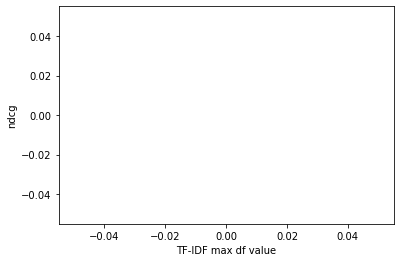

In [37]:
plt.figure()
plt.xlabel('TF-IDF max df value')
plt.ylabel('ndcg')
for l in ['python', 'go', 'java', 'javascript']:
    tdata = data_index[l]
    tfilt = (tdata['langfilter'] == True) & ((tdata['max_df_param'] == 1.0) | (tdata['max_df_param'] == None))
    tplt = tdata[tfilt]
        
    plot_indices = np.argsort(tplt['max_df_param'])
    plt.plot(tplt.iloc[plot_indices]['max_df_param'], tplt.iloc[plot_indices]['ndcg'], color = col_ind[l])

plt.show()

# Fix min_df_param = 0, yes language filter

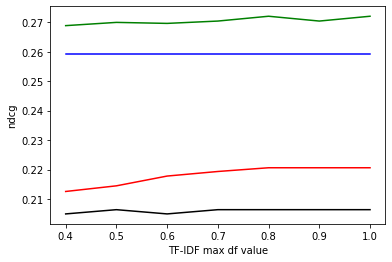

In [38]:
plt.figure()
plt.xlabel('TF-IDF max df value')
plt.ylabel('ndcg')
for l in ['python', 'go', 'java', 'javascript']:
    tdata = data_index[l]
    tfilt = (tdata['langfilter'] == True) & (tdata['min_df_param'] <= 0.00)
    tplt = tdata[tfilt]
        
    plot_indices = np.argsort(tplt['max_df_param'])
    plt.plot(tplt.iloc[plot_indices]['max_df_param'], tplt.iloc[plot_indices]['ndcg'], color = col_ind[l])

plt.show()

# Fix min_df_param = 0, yes language filter, accuracy

tfidf_cosine_sim_min_df=0.0_syntax_filtered_accuracy .png


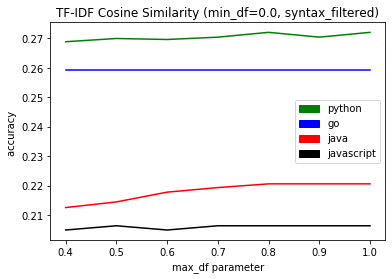

tfidf_cosine_sim_min_df=0.0__accuracy .png


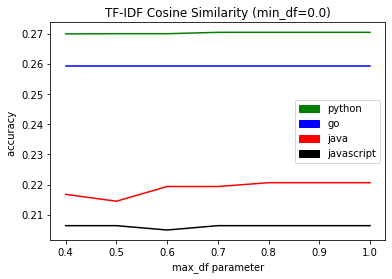

tfidf_cosine_sim_min_df=0.0_syntax_filtered_accuracy  .png


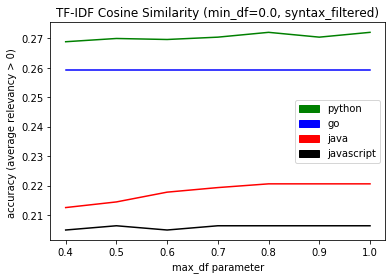

tfidf_cosine_sim_min_df=0.0__accuracy  .png


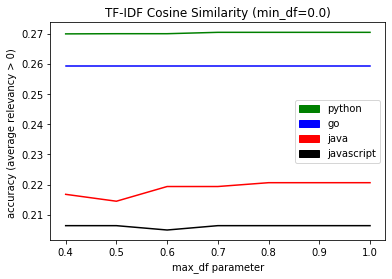

tfidf_cosine_sim_min_df=0.0_syntax_filtered_ndcg.png


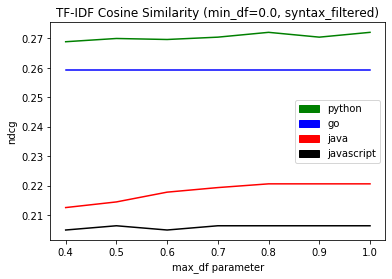

tfidf_cosine_sim_min_df=0.0__ndcg.png


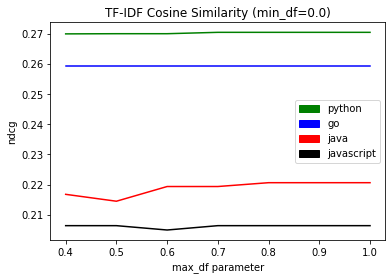

tfidf_cosine_sim_min_df=0.0_syntax_filtered_ndcg (full rank).png


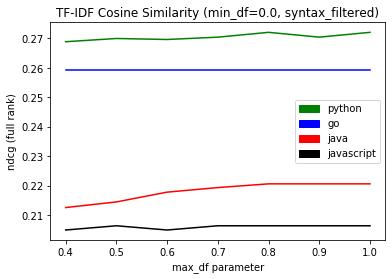

tfidf_cosine_sim_min_df=0.0__ndcg (full rank).png


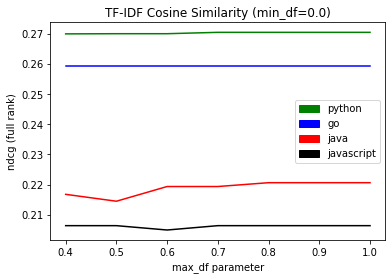

In [28]:
for yaxis in ['accuracy (%)', 'accuracy (average relevancy > 0) (%)', 'ndcg', 'ndcg (full rank)']:
    for z in [True, False]:
        plt.figure()
        plt.xlabel('max_df parameter') 
        plt.ylabel(yaxis.replace('(%)', ''))
        syntax_filtered = ', syntax_filtered' if z else ''
        plt.title('TF-IDF Cosine Similarity (min_df=0.0{})'.format(syntax_filtered))
        
        patches = [mpatches.Patch(color=col_ind[lan] ,label=lan) for lan in ['python', 'go', 'java', 'javascript']]
        plt.legend(handles=patches)
        for l in ['python', 'go', 'java', 'javascript']:   
            tdata = data_index[l]
            tfilt = (tdata['langfilter'] == z) & (tdata['min_df_param'] <= 0.00)
            tplt = tdata[tfilt]

            plot_indices = np.argsort(tplt['max_df_param'])
            plt.plot(tplt.iloc[plot_indices]['max_df_param'], 
                     tplt.iloc[plot_indices]['ndcg'], 
                     color = col_ind[l])
        print('tfidf_cosine_sim_min_df=0.0_{}_{}.png'.format(syntax_filtered[2:], 
                                                            yaxis.replace(' (%)', '').replace('(average relevancy > 0)', '')))
        plt.savefig('tfidf_cosine_sim_min_df=0.0_{}_{}.png'.format(syntax_filtered[2:], 
                                                            yaxis.replace(' (%)', '').replace('(average relevancy > 0)', '')))
        plt.show()


# Fix Max Filter - raise min filter

tfidf_cosine_sim_min_df=0.0_syntax_filtered_ndcg.png


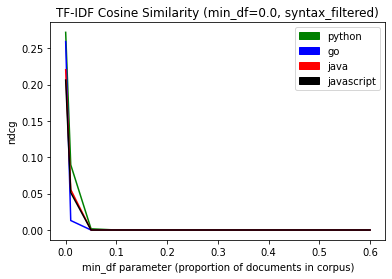

tfidf_cosine_sim_min_df=0.0_syntax_filtered_ndcg (full rank).png


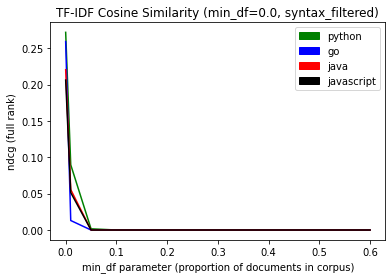

In [55]:
for yaxis in ['ndcg', 'ndcg (full rank)']:
    for z in [True]:
        plt.figure()
        plt.xlabel('min_df parameter (proportion of documents in corpus)') 
        plt.ylabel(yaxis.replace('(%)', ''))
        syntax_filtered = ', syntax_filtered' if z else ''
        plt.title('TF-IDF Cosine Similarity (min_df=0.0{})'.format(syntax_filtered))
        
        patches = [mpatches.Patch(color=col_ind[lan] ,label=lan) for lan in ['python', 'go', 'java', 'javascript']]
        plt.legend(handles=patches)
        for l in ['python', 'go', 'java', 'javascript']:   
            tdata = data_index[l]
            tfilt = (tdata['langfilter'] == z) & (tdata['min_df_param'] < 1.0) & ((tdata['max_df_param'] == '1.0') | (tdata['max_df_param'] == 'None'))
#             tfilt = (tdata['langfilter'] == z) & ((tdata['max_df_param'] == '1.0') | (tdata['max_df_param'] == 'None'))
            tplt = tdata[tfilt]

            plot_indices = np.argsort(tplt['min_df_param'])
            plt.plot(tplt.iloc[plot_indices]['min_df_param'], 
                     tplt.iloc[plot_indices]['ndcg'], 
                     color = col_ind[l])
        print('tfidf_cosine_sim_min_df=0.0_{}_{}.png'.format(syntax_filtered[2:], 
                                                            yaxis.replace(' (%)', '').replace('(average relevancy > 0)', '')))
#         plt.savefig('tfidf_cosine_sim_min_df=0.0_{}_{}.png'.format(syntax_filtered[2:], 
#                                                             yaxis.replace(' (%)', '').replace('(average relevancy > 0)', '')))
        plt.show()


tfidf_cosine_sim_min_df=0.0_syntax_filtered_ndcg.png


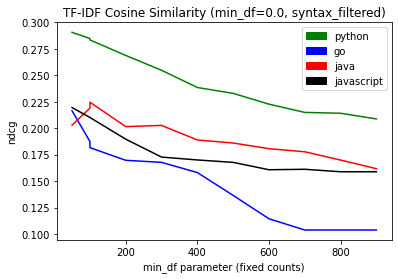

tfidf_cosine_sim_min_df=0.0_syntax_filtered_ndcg (full rank).png


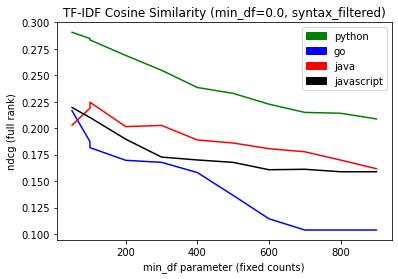

In [56]:
for yaxis in ['ndcg', 'ndcg (full rank)']:
    for z in [True]:
        plt.figure()
        plt.xlabel('min_df parameter (fixed counts)') 
        plt.ylabel(yaxis.replace('(%)', ''))
        syntax_filtered = ', syntax_filtered' if z else ''
        plt.title('TF-IDF Cosine Similarity (min_df=0.0{})'.format(syntax_filtered))
        
        patches = [mpatches.Patch(color=col_ind[lan] ,label=lan) for lan in ['python', 'go', 'java', 'javascript']]
        plt.legend(handles=patches)
        for l in ['python', 'go', 'java', 'javascript']:   
            tdata = data_index[l]
            tfilt = (tdata['langfilter'] == z) & (tdata['min_df_param'] > 1.0) & ((tdata['max_df_param'] == '1.0') | (tdata['max_df_param'] == 'None'))
#             tfilt = (tdata['langfilter'] == z) & ((tdata['max_df_param'] == '1.0') | (tdata['max_df_param'] == 'None'))
            tplt = tdata[tfilt]

            plot_indices = np.argsort(tplt['min_df_param'])
            plt.plot(tplt.iloc[plot_indices]['min_df_param'], 
                     tplt.iloc[plot_indices]['ndcg'], 
                     color = col_ind[l])
        print('tfidf_cosine_sim_min_df=0.0_{}_{}.png'.format(syntax_filtered[2:], 
                                                            yaxis.replace(' (%)', '').replace('(average relevancy > 0)', '')))
#         plt.savefig('tfidf_cosine_sim_min_df=0.0_{}_{}.png'.format(syntax_filtered[2:], 
#                                                             yaxis.replace(' (%)', '').replace('(average relevancy > 0)', '')))
        plt.show()
